In [14]:
%pip install colorhash --break-system-packages
import csv
import math
import os
import matplotlib.pyplot as plt
from colorhash import ColorHash
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
with open('data.2.csv', 'r') as f:
    text = f.read()
keys = text.split('\n')[0].split(',')[:-1] # get first row split by commas, exclude 
print(f"{keys=}")
DATA = []
for line in text.split("\n")[1:]:
    values = line.split(',')[:-1]
    if len(values) != len(keys):
        print(f"skipping line: '{line}'")
        continue
    dp = {}
    for i in range(len(values)):
        v = values[i]
        try:
            v = float(v)
        except ValueError:
            pass
        dp[keys[i]]=v
    
    DATA.append(dp)
print(f"{len(DATA)=}")


keys=['file', 'out', 'zipper', 'iter', 'time', 'size']
skipping line: ''
len(DATA)=336


In [28]:
FILES = np.unique_values([ent['file'] for ent in DATA])
ZIPPERS = np.unique_values([ent['zipper'] for ent in DATA])

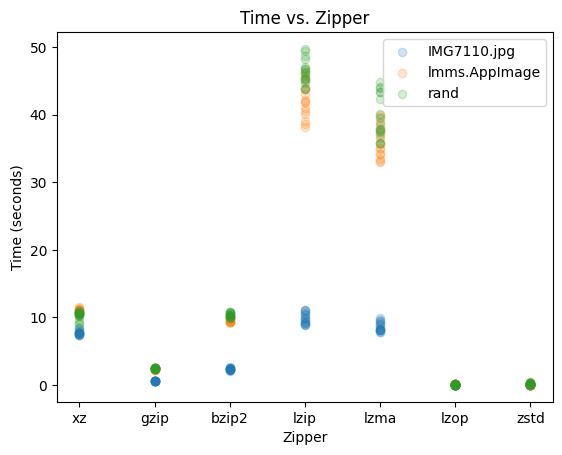

In [29]:
for file in FILES:
    d = [ent for ent in DATA if ent['file']==file]
    plt.scatter(
        [ent['zipper'] for ent in d],
        [ent['time'] for ent in d],
        alpha=0.2,
        label=file
    )
plt.legend()
plt.xlabel("Zipper")
plt.ylabel("Time (seconds)")
plt.title("Time vs. Zipper")
plt.show()

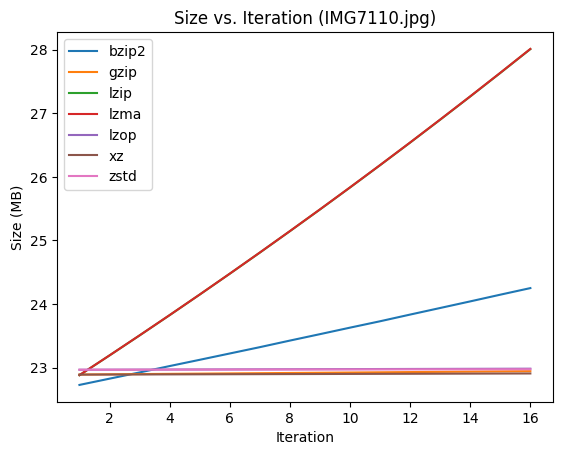

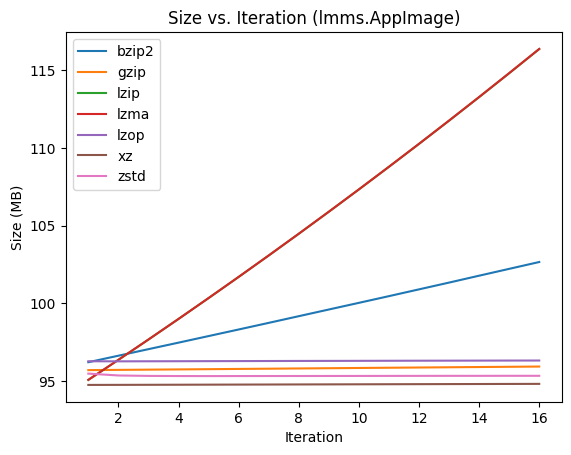

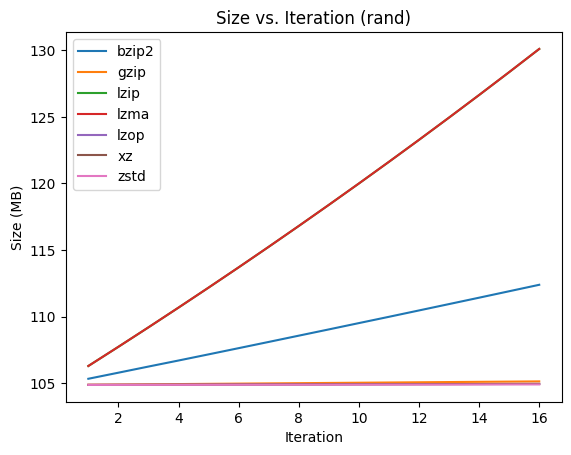

In [30]:
for file in FILES:
    d = [ent for ent in DATA if ent['file']==file]
    for zipper in ZIPPERS:
        zd = [ent for ent in d if ent['zipper']==zipper]
        plt.plot(
            [ent['iter'] for ent in zd],
            [ent['size']/1_000_000 for ent in zd],
            label=zipper
        )
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Size (MB)")
    plt.title(f"Size vs. Iteration ({file})")
    plt.show()